In [1]:
import numpy as np
import pandas as pd
import pytz as tz
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from NumberClusterFinder import NumberClusterFinder
from DensityKmeans import DensityKmeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import numpy as np

x_array = np.array([2, 3, 5, 6, 7, 4, 8, 7, 6])
normalized_arr = preprocessing.normalize([x_array])
normalized_arr

array([[0.11785113, 0.1767767 , 0.29462783, 0.35355339, 0.41247896,
        0.23570226, 0.47140452, 0.41247896, 0.35355339]])

In [3]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan',
          'navy', 'red', 'blue', 'green']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [4]:
df = pd.read_csv('../dataset/Gowalla_totalCheckins.txt', sep='\t', header=None)
df.columns = ['userid', 'timestamp', 'latitude', 'longitude', 'spotid']
df.head()

,userid,timestamp,latitude,longitude,spotid
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878


In [5]:
# lon_min, lat_min, lon_max, lat_max = -74.2589, 40.4774, -73.7004, 40.9176
nyc_events = df
nyc_events.head()

,userid,timestamp,latitude,longitude,spotid
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878


In [6]:
nyc_events.shape

(6442892, 5)

In [7]:
venues = pd.read_csv('../dataset/spots.txt', sep='\t', header=0)
venues.head()

,spotid,spotname,geo-coordinates
0,1391604,Conference House Park,POINT(-74.2523431778 40.5017589436)
1,1391611,Almer G. Russell Pavilion,POINT(-74.2542636395 40.5022647413)
2,3612422,Conference House,POINT(-74.2490418254 40.5000644614)
3,3612431,Billop House,POINT(-74.2490418254 40.5000644614)
4,1391499,Biddle House,POINT(-74.2541456223 40.5054829933)


In [8]:
def parse_datetime(s):
    tzone = tz.timezone("America/New_York")  #parse_datetime
    utc = datetime.strptime(s, '%Y-%m-%dT%H:%M:%SZ')
    return tz.utc.localize(utc).astimezone(tzone).timestamp()

In [9]:
nyc_events['ts'] = nyc_events['timestamp'].apply(lambda x: parse_datetime(x))
# nyc_events = nyc_events.drop('timestamp', axis=1, errors='ignore')

# #local date and time
# nyc_events['date'] = nyc_events['ts'].astype(object).apply(lambda x: x.date())
# nyc_events['time'] = nyc_events['ts'].astype(object).apply(lambda x: x.time())
#
# #day of the week (localtime)
# #hour of the day (localtime)
# nyc_events['weekday'] = nyc_events['date'].astype(object).apply(lambda x: x.weekday())
# nyc_events['day'] = nyc_events['date'].astype(object).apply(lambda x: x.day)
# nyc_events['hour'] = nyc_events['time'].astype(object).apply(lambda x: x.hour)

nyc_events

,userid,timestamp,latitude,longitude,spotid,ts
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847,1.287533e+09
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315,1.287440e+09
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637,1.287359e+09
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516,1.287344e+09
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878,1.287255e+09
...,...,...,...,...,...,...
6442887,196578,2010-06-11T13:32:26Z,51.742988,-0.488065,906885,1.276263e+09
6442888,196578,2010-06-11T13:26:45Z,51.746492,-0.490780,965121,1.276263e+09
6442889,196578,2010-06-11T13:26:34Z,51.741916,-0.496729,1174322,1.276263e+09
6442890,196585,2010-10-08T21:01:49Z,50.105516,8.571525,471724,1.286572e+09


In [10]:
nyc_events[0:5]

,userid,timestamp,latitude,longitude,spotid,ts
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847,1.287533e+09
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315,1.287440e+09
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637,1.287359e+09
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516,1.287344e+09
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878,1.287255e+09


In [11]:
nyc_events = pd.DataFrame.merge(nyc_events, venues[['spotid', 'spotname']], on='spotid', how="inner")
nyc_events

,userid,timestamp,latitude,longitude,spotid,ts,spotname
0,0,2010-10-12T00:21:28Z,40.643885,-73.782806,23261,1.286843e+09,JFK John F. Kennedy International
1,0,2010-10-07T15:27:40Z,40.643885,-73.782806,23261,1.286465e+09,JFK John F. Kennedy International
2,5,2010-08-16T03:47:20Z,40.643885,-73.782806,23261,1.281930e+09,JFK John F. Kennedy International
3,8,2010-10-06T20:23:14Z,40.643885,-73.782806,23261,1.286397e+09,JFK John F. Kennedy International
4,15,2010-10-13T04:10:36Z,40.643885,-73.782806,23261,1.286943e+09,JFK John F. Kennedy International
...,...,...,...,...,...,...,...
114708,194967,2010-08-04T00:26:18Z,40.823098,-74.219366,865373,1.280882e+09,Quik Check
114709,195787,2010-05-19T02:52:14Z,40.737428,-74.004173,1042049,1.274238e+09,Coopy's Den
114710,195787,2010-05-01T00:34:10Z,40.737428,-74.004173,1042049,1.272674e+09,Coopy's Den
114711,195789,2010-10-21T00:04:03Z,40.726720,-73.986155,16965,1.287619e+09,Counter


In [12]:
pre_event = nyc_events.drop("spotid", axis=1)
pre_event = pre_event.drop("timestamp", axis=1)
pre_event = pre_event.drop("spotname", axis=1)
pre_event = pre_event.drop("ts", axis=1)
# pre_event = pre_event.drop("spotname", axis=1)
# pre_event = pre_event.drop("cluster", axis=1)
# pre_event = pre_event.drop("date", axis=1)
# pre_event = pre_event.drop("time", axis=1)
pre_event = pre_event.drop("userid", axis=1)
# pre_event = pre_event.drop("hour", axis=1)
# pre_event = pre_event.drop("weekday", axis=1)
# pre_event = pre_event.drop("day", axis=1)
pre_event

,latitude,longitude
0,40.643885,-73.782806
1,40.643885,-73.782806
2,40.643885,-73.782806
3,40.643885,-73.782806
4,40.643885,-73.782806
...,...,...
114708,40.823098,-74.219366
114709,40.737428,-74.004173
114710,40.737428,-74.004173
114711,40.726720,-73.986155


In [13]:
scaler = preprocessing.MinMaxScaler()
names = pre_event.columns
d = scaler.fit_transform(pre_event)
scaled_df = pd.DataFrame(d)
scaled_df.head()

,0,1
0,0.373318,0.925622
1,0.373318,0.925622
2,0.373318,0.925622
3,0.373318,0.925622
4,0.373318,0.925622


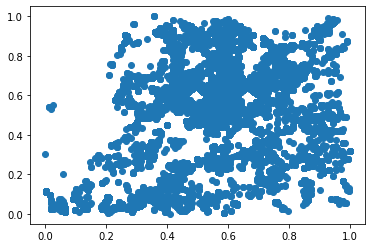

In [14]:
# fig = plt.figure()
# ax = Axes3D(fig)
chart = scaled_df.to_numpy()
plt.scatter(chart[:, 0], chart[:, 1])

In [15]:
# plt.rcParams['figure.figsize'] = (20.0, 20.0)
# plt.rcParams.update({'font.size': 12})
# plt.rcParams['xtick.major.pad'] = '5'
# plt.rcParams['ytick.major.pad'] = '5'
# plt.style.use('ggplot')
#
# plt.subplot(4, 1, 1)
# top = nyc_events.groupby('date').size()
# plt.plot(top.index, top, 'g-')
# plt.title('Gowalla App usage over time')
# plt.show()

In [16]:
# plt.style.use('ggplot')
# fig = plt.figure()
# fig.set_size_inches(21, 4)
#
# plt.subplot(1, 3, 1)
# top = nyc_events.groupby('hour').size()
# plt.bar(top.index, top, align='center', color='red')
# plt.title('Check-ins: Hour of the day')
#
# plt.subplot(1, 3, 2)
# top = nyc_events.groupby('weekday').size()
# plt.bar(top.index, top, align='center', color='blue')
# plt.title('Check-ins: Day of the week')
#
# plt.subplot(1, 3, 3)
# top = nyc_events.groupby('day').size()
# plt.bar(top.index, top, align='center', color='green')
# plt.title('Check-ins: Day of the month')
#
# plt.show()

In [17]:
len(scaled_df)

114713

In [35]:
kmeans = KMeans(n_clusters=3, init='k-means++')

# Compute the clusters based on longitude and latitude features
X_sample = scaled_df.sample(frac=0.1)
X_sample = X_sample.to_numpy()
kmeans.fit(X_sample)
y = kmeans.labels_
print("silhouette_score ", silhouette_score(X_sample, y, metric='euclidean'))

silhouette_score  0.6600184877608726


In [36]:

len(X_sample)

11471

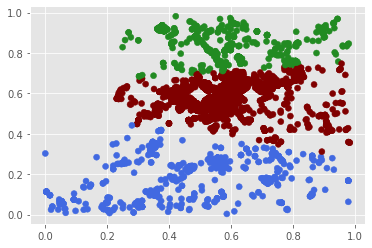

In [37]:
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=vectorizer(y))

In [38]:
densityKmeans = DensityKmeans(X_sample)
densityKmeans.fit()
y = densityKmeans.labels_
y.max()
# print("k = 240", " silhouette_score ", silhouette_score(X_sample, y, metric='euclidean'))

5

In [39]:
print("silhouette_score ", silhouette_score(X_sample, y, metric='euclidean'))

silhouette_score  0.6256023660841011


In [40]:
densityKmeans.labels_.max()

5

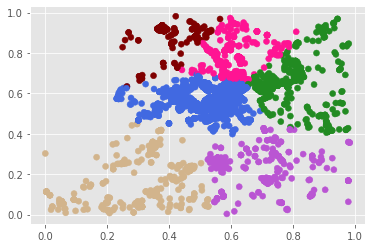

In [41]:
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=vectorizer(y))

In [25]:
len(densityKmeans.getDeletePoint())

122

In [26]:
densityKmeans.labels_.max()

10

In [1]:
scaled_kmeans = KMeans(n_clusters=11, init='k-means++')
scaled_sample = scaled_df.sample(frac=0.1)
scaled_kmeans.fit(scaled_sample)
y_scaled = scaled_kmeans.labels_
print("k = 240", " silhouette_score ", silhouette_score(scaled_sample, y_scaled, metric='euclidean'))

NameError: name 'KMeans' is not defined

In [28]:
nyc_events['cluster'] = kmeans.predict(nyc_events[['longitude', 'latitude']])
nyc_events[['userid', 'latitude', 'longitude', 'spotid', 'cluster']].sample(10)

/home/aliqasemi/PycharmProjects/DesignPattern/Recommend/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,userid,latitude,longitude,spotid,cluster
34593,2620,40.759570,-73.976977,72046,2
41511,27948,40.734234,-74.164517,19812,2
91958,10433,40.741544,-74.000512,157731,2
58120,842,40.689962,-73.983741,879163,2
3018,5717,40.756880,-73.986225,11844,2
28390,3400,40.762558,-73.973829,23733,2
81537,14658,40.673014,-73.984691,664730,2
77609,123803,40.722392,-74.003777,1266021,2
3154,18054,40.756880,-73.986225,11844,2
98762,10382,40.723620,-74.005023,854514,2


In [29]:
gdf = nyc_events.groupby(['cluster', 'spotid']).size().reset_index()
gdf.columns = ['cluster', 'spotid', 'count']
idx = gdf.groupby(['cluster'])['count'].transform(max) == gdf['count']
topvenues_df = gdf[idx].merge(venues, on='spotid', how='left').sort_values(by='count', ascending=False)
#top 10 out of 200 clusters by events count
topvenues = topvenues_df[:10]
topvenues

,cluster,spotid,count,spotname,geo-coordinates
0,2,12505,1680,LGA LaGuardia Airport,POINT(-73.8720059395 40.7745781069)


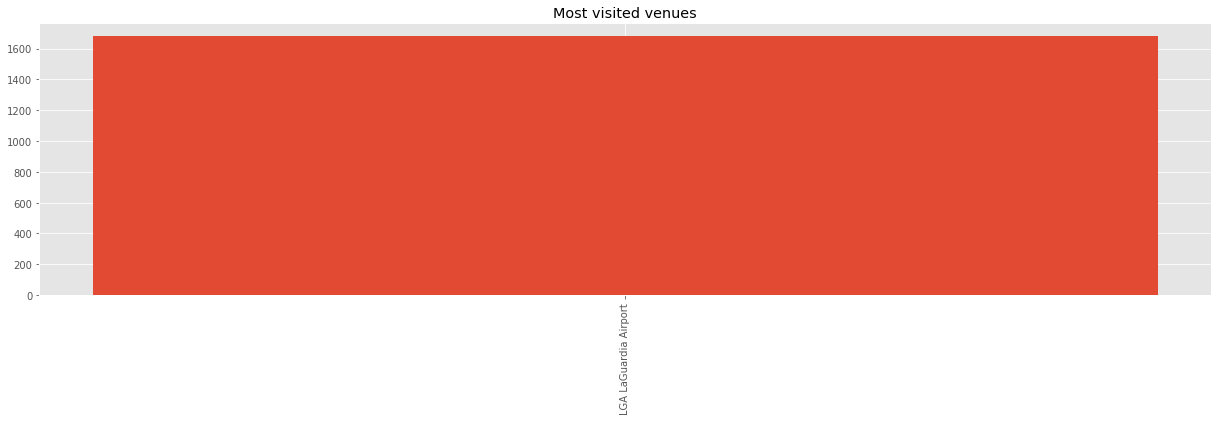

In [30]:
plt.style.use('ggplot')
fig = plt.figure()
fig.set_size_inches(21, 5)

plt.bar(range(len(topvenues)), topvenues['count'], align='center')
plt.xticks(range(len(topvenues)), topvenues['spotname'], rotation='vertical')
plt.title('Most visited venues')
plt.show()

In [31]:
def recommend_venues(df, longitude, latitude):
    predicted_cluster = kmeans.predict(np.array([longitude, latitude]).reshape(1, -1))[0]
    # Fetch the venue name of the top most record in the topvenues dataframe for the predicted cluster
    venue_name = df[df['cluster'] == predicted_cluster].iloc[0]['spotname']
    msg = 'What about visiting the ' + venue_name + '?'
    return msg

In [32]:
recommend_venues(topvenues_df, -74, 40.55)

'What about visiting the LGA LaGuardia Airport?'

In [33]:
recommend_venues(topvenues_df, -73.993, 40.75)

'What about visiting the LGA LaGuardia Airport?'